# Introduction

# Name: Pratiksha Kishor Patil
Batch: ML9    

# Exploratory Data Analysis (EDA)

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Importing the CSV file**

In [61]:
df=pd.read_csv("heart.csv")

**Top 5 rows of the dataset**

In [62]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [63]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [65]:
df.shape

(918, 12)

**Number of null values in each column**

In [66]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Descriptive Statistics of the Dataset**

In [67]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**All column names**

In [68]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Data Visualization

**Count of the number of patients with diseases vs with no diseases**

<Axes: xlabel='HeartDisease', ylabel='count'>

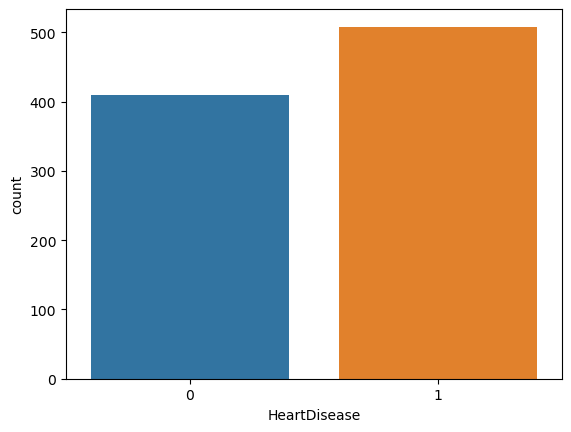

In [69]:
sns.countplot(x='HeartDisease', data = df)

**Pie chart showing the percentage of male patients vs female**

<Axes: ylabel='Sex'>

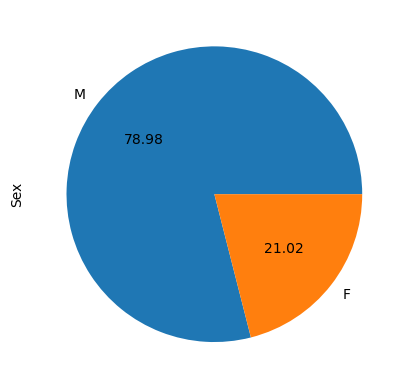

In [70]:
df['Sex'].value_counts().plot.pie(autopct='%.2f')

**Chest pain type based on Target variable**

<Axes: xlabel='ChestPainType', ylabel='Age'>

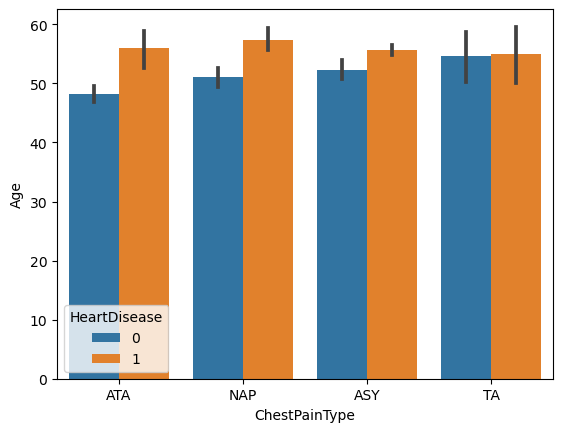

In [71]:
sns.barplot(y='Age',x='ChestPainType',data=df,hue='HeartDisease')

**Distribution of the age of the patients**

<Axes: xlabel='Age', ylabel='Density'>

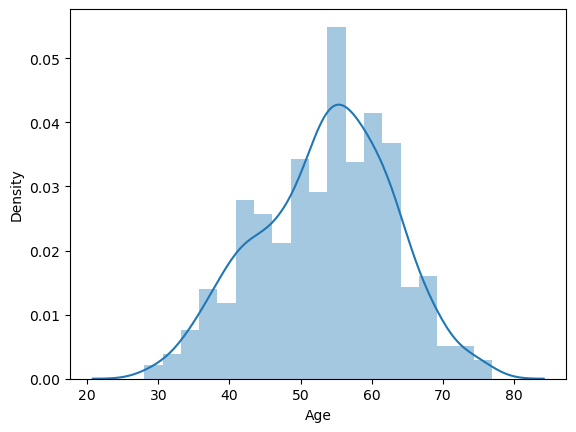

In [72]:
sns.distplot(df['Age'], kde=True)

**Correlation graph of all variables**

<Axes: >

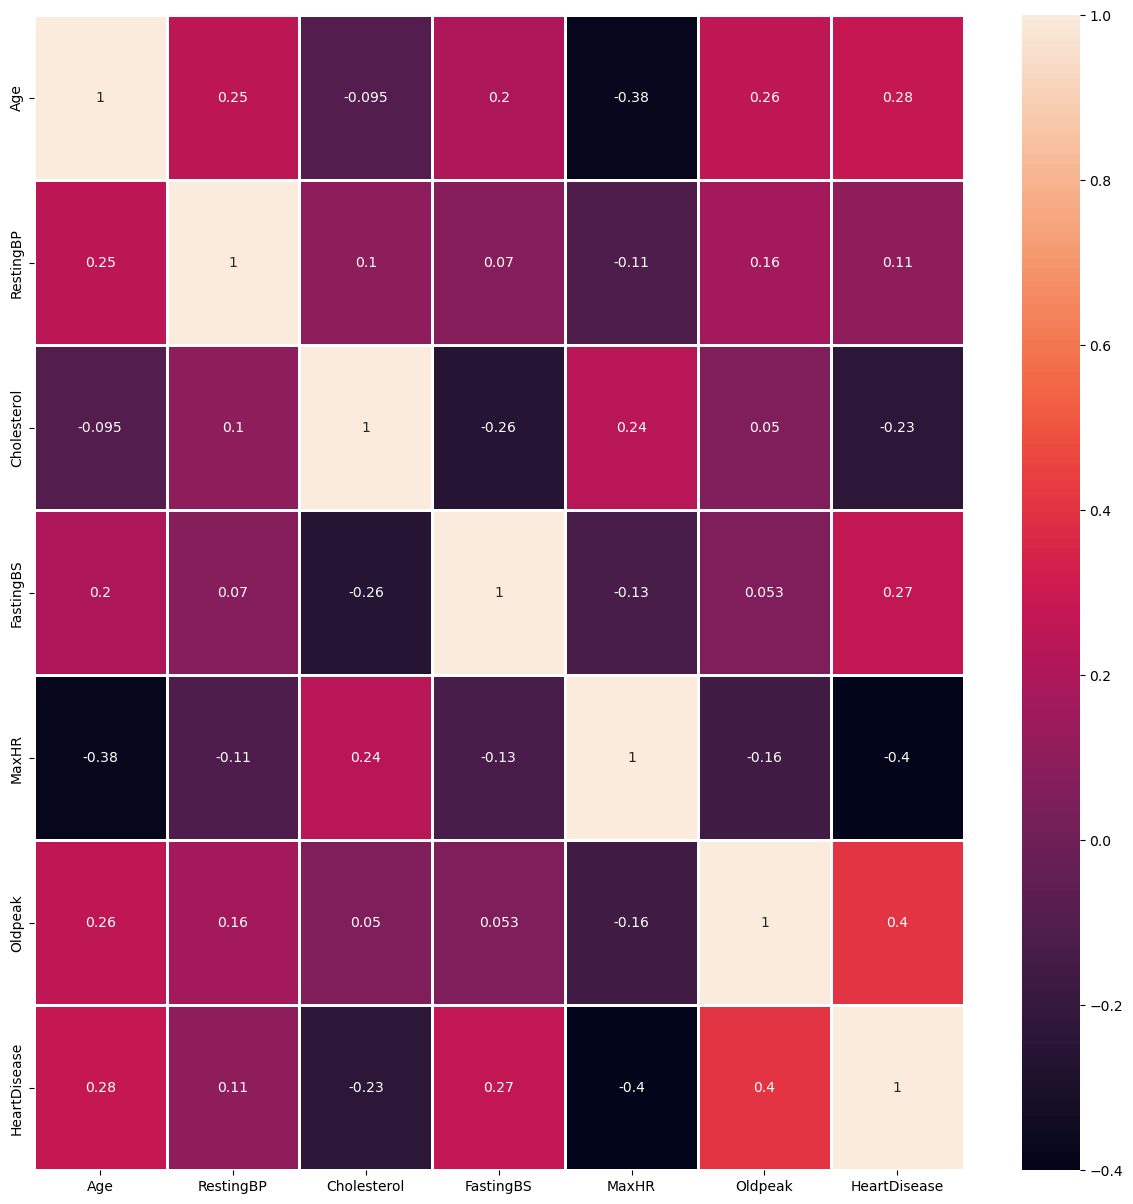

In [73]:
corr=df.corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr, linewidth=1,annot=True,linecolor='white')

**Defining the independent X variables and dependent y variables**

In [74]:
X = df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
y = df['HeartDisease']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling 

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic Regression

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression. it’s referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class.

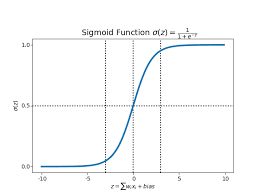

In [79]:
from sklearn.linear_model import  LogisticRegression

In [80]:
lr=LogisticRegression()
model_lr=lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
lr_acc = model_lr.score(X_test,y_test)
lr_acc

0.7869565217391304

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [82]:
cm_lr=confusion_matrix(y_test,pred_lr)
print("Confusion Matrix   :", cm_lr)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy   :", accuracy_lr)
precision_lr = precision_score(y_test, pred_lr)
print("Precision :", precision_lr)
recall_lr = recall_score(y_test, pred_lr)
print("Recall    :", recall_lr)
F1_score_lr = f1_score(y_test, pred_lr)
print("F1-score  :", F1_score_lr)

Confusion Matrix   : [[ 76  22]
 [ 27 105]]
Accuracy   : 0.7869565217391304
Precision : 0.8267716535433071
Recall    : 0.7954545454545454
F1-score  : 0.8108108108108109


# Random Forest Classifier

Random Forest is one of the most popular and commonly used algorithms by Data Scientists. Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

Random forest is a versatile machine learning algorithm developed by Leo Breiman and Adele Cutler. It leverages an ensemble of multiple decision trees to generate predictions or classifications. By combining the outputs of these trees, the random forest algorithm delivers a consolidated and more accurate result.

Its widespread popularity stems from its user-friendly nature and adaptability, enabling it to tackle both classification and regression problems effectively. The algorithm’s strength lies in its ability to handle complex datasets and mitigate overfitting, making it a valuable tool for various predictive tasks in machine learning.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks.

![Random Forest Classifier](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=5)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
lr_acc1 = rf.score(X_test,y_test)
lr_acc1

0.7652173913043478

In [85]:
cm_rf=confusion_matrix(y_test,pred_rf)
print("Confusion Matrix   :", cm_rf)
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy   :", accuracy_rf)
precision_rf = precision_score(y_test, pred_rf)
print("Precision :", precision_rf)
recall_rf = recall_score(y_test, pred_rf)
print("Recall    :", recall_rf)
F1_score_rf = f1_score(y_test, pred_rf)
print("F1-score  :", F1_score_rf)

Confusion Matrix   : [[ 70  28]
 [ 26 106]]
Accuracy   : 0.7652173913043478
Precision : 0.7910447761194029
Recall    : 0.803030303030303
F1-score  : 0.7969924812030075


# Support Vector Machine (SVM)

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems. They were very famous around the time they were created, during the 1990s, and keep on being the go-to method for a high-performing algorithm with a little tuning.

![SVM](https://nl.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1689248290697.jpg)

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [87]:
svc =  SVC(C=2)
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
lr_acc2 = svc.score(X_test,y_test)
lr_acc2

0.7739130434782608

In [88]:
cm_svm=confusion_matrix(y_test,pred_svm)
print("Confusion Matrix   :", cm_svm)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy   :", accuracy_svm)
precision_svm = precision_score(y_test, pred_svm)
print("Precision :", precision_svm)
recall_svm = recall_score(y_test, pred_svm)
print("Recall    :", recall_svm)
F1_score_svm = f1_score(y_test, pred_svm)
print("F1-score  :", F1_score_svm)

Confusion Matrix   : [[ 78  20]
 [ 32 100]]
Accuracy   : 0.7739130434782608
Precision : 0.8333333333333334
Recall    : 0.7575757575757576
F1-score  : 0.7936507936507938


# KNN

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [91]:
cm_knn=confusion_matrix(y_test,pred_knn)
print("Confusion Matrix   :", cm_knn)
accuracy_knn = accuracy_score(y_test, pred_knn)
print("Accuracy   :", accuracy_knn)
precision_knn = precision_score(y_test, pred_knn)
print("Precision :", precision_knn)
recall_knn = recall_score(y_test, pred_knn)
print("Recall    :", recall_knn)
F1_score_knn= f1_score(y_test, pred_knn)
print("F1-score  :", F1_score_knn)

Confusion Matrix   : [[ 75  23]
 [ 27 105]]
Accuracy   : 0.782608695652174
Precision : 0.8203125
Recall    : 0.7954545454545454
F1-score  : 0.8076923076923076


# Deployment

In [92]:
input_data=(40,160,180,0,156,1)
input_data_np=np.array(input_data)
input_data_re=input_data_np.reshape(1,-1)
pred=rf.predict(input_data_re)
print(pred)

[1]
